### Modeling Fakeddit
* [Paper](https://arxiv.org/pdf/1911.03854.pdf)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/fakeddit/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['hasImage', 'image_url'], inplace=True)
df.head()

,author,clean_title,created_utc,domain,id,linked_submission_id,num_comments,score,subreddit,title,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,michaelconfoy,loose talk got there first keep it under your ...,1.429942e+09,i.imgur.com,datasets/fakeddit/images/33snxf.jpg,NaN,6.0,70,propagandaposters,"""Loose talk got there first! Keep it under you...",...,0.017499,0.040466,0.121275,-0.046296,0.051412,0.016091,0.010176,0.065790,-0.091243,-0.035023
1,SaltMineForeman,this tree at my campsite naturally grew a hear...,1.554421e+09,i.imgur.com,datasets/fakeddit/images/b9k2ta.jpg,NaN,2.0,30,mildlyinteresting,This tree at my campsite naturally grew a hear...,...,-0.035342,0.014651,0.022642,-0.005436,-0.041879,0.019345,-0.020924,0.012200,-0.047352,0.045813
2,Shawn_666,fdr addressing the nation,1.522982e+09,i.redd.it,datasets/fakeddit/images/8a5wy9.jpg,NaN,1.0,12,fakehistoryporn,FDR addressing the nation (1932),...,-0.027288,0.020853,-0.003959,0.000404,0.034326,-0.029220,-0.002929,-0.065850,0.016998,0.019142
3,YOLO2THEMAX,face morph,1.448948e+09,NaN,datasets/fakeddit/images/cxiu2qb.jpg,3urf4a,NaN,2,psbattle_artwork,Face morph,...,-0.011685,-0.003866,0.037784,0.010292,-0.004787,0.003773,-0.012201,-0.028986,-0.010641,-0.032186
4,FarMojo,a japanese kamikaze pilot of the sixth air arm...,1.559169e+09,i.redd.it,datasets/fakeddit/images/bul96p.jpg,NaN,0.0,8,fakehistoryporn,A Japanese kamikaze pilot of the sixth air arm...,...,0.021707,0.011216,0.022868,-0.023618,-0.039166,-0.000059,0.033039,-0.088854,0.024785,-0.023957


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = '2_way_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (56214, 1039)
Test Shape: (5911, 1039)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == '2_way_label':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131585


STAGE:2024-02-10 17:05:58 61610:61610 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.9178, macro-f1: 0.9132
Epoch 1/15 - Training Time: 5.05 seconds | Inference Time: 0.42 seconds
Epoch 2/15 - Test Accuracy: 0.9261, macro-f1: 0.9226
Epoch 2/15 - Training Time: 5.35 seconds | Inference Time: 0.40 seconds
Epoch 3/15 - Test Accuracy: 0.9278, macro-f1: 0.9247
Epoch 3/15 - Training Time: 3.38 seconds | Inference Time: 0.41 seconds
Epoch 4/15 - Test Accuracy: 0.9327, macro-f1: 0.9300
Epoch 4/15 - Training Time: 3.73 seconds | Inference Time: 0.41 seconds
Epoch 5/15 - Test Accuracy: 0.9291, macro-f1: 0.9260
Epoch 5/15 - Training Time: 3.58 seconds | Inference Time: 0.43 seconds
Epoch 6/15 - Test Accuracy: 0.9278, macro-f1: 0.9245
Epoch 6/15 - Training Time: 4.01 seconds | Inference Time: 0.42 seconds
Epoch 7/15 - Test Accuracy: 0.9229, macro-f1: 0.9187
Epoch 7/15 - Training Time: 3.95 seconds | Inference Time: 0.44 seconds
Epoch 8/15 - Test Accuracy: 0.9196, macro-f1: 0.9154
Epoch 8/15 - Training Time: 4.01 seconds | Inference Time: 0.54 seconds


STAGE:2024-02-10 17:07:22 61610:61610 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 17:07:22 61610:61610 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch        10.41%        6.905s        64.70%       42.933s       3.256ms      -3.22 Gb      -3.28 Gb         13185  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        31.75%       21.068s        32.38%       21.489s       1.471ms       3.55 Gb       3.55 Gb         14610  
                              Optimizer.step#AdamW.step         7.25%        4.813s        24.37%       16.173s       1.227ms       1.00 Mb     -12.85

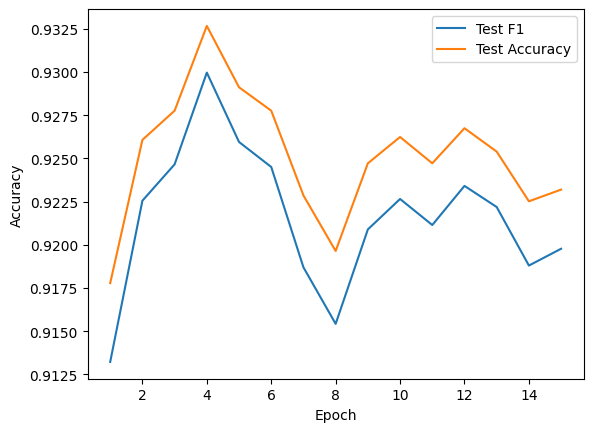

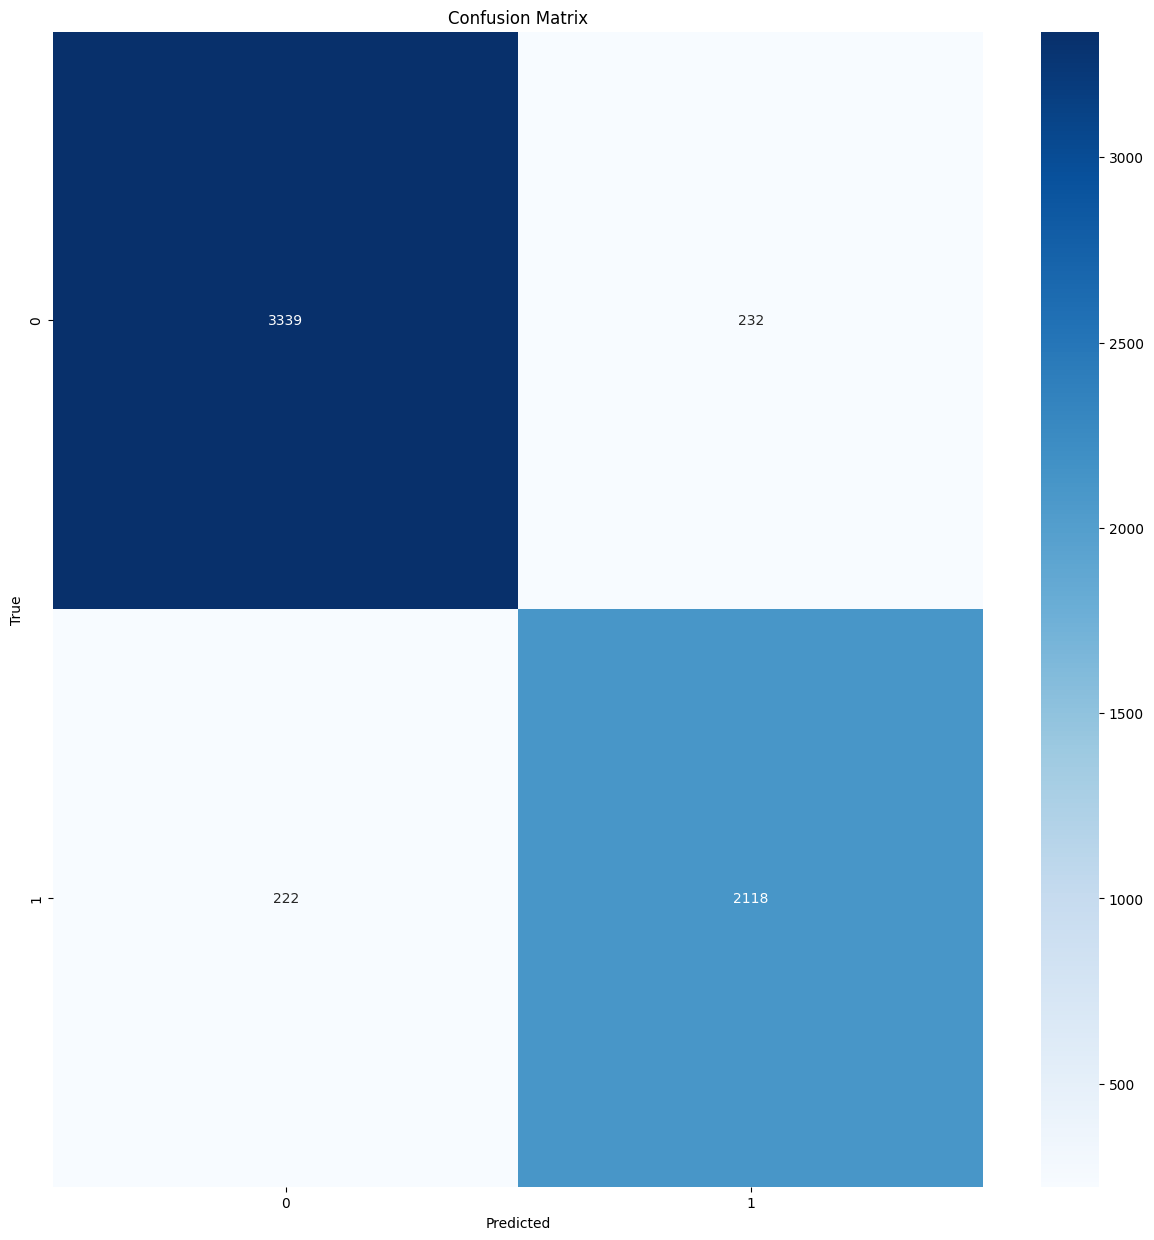

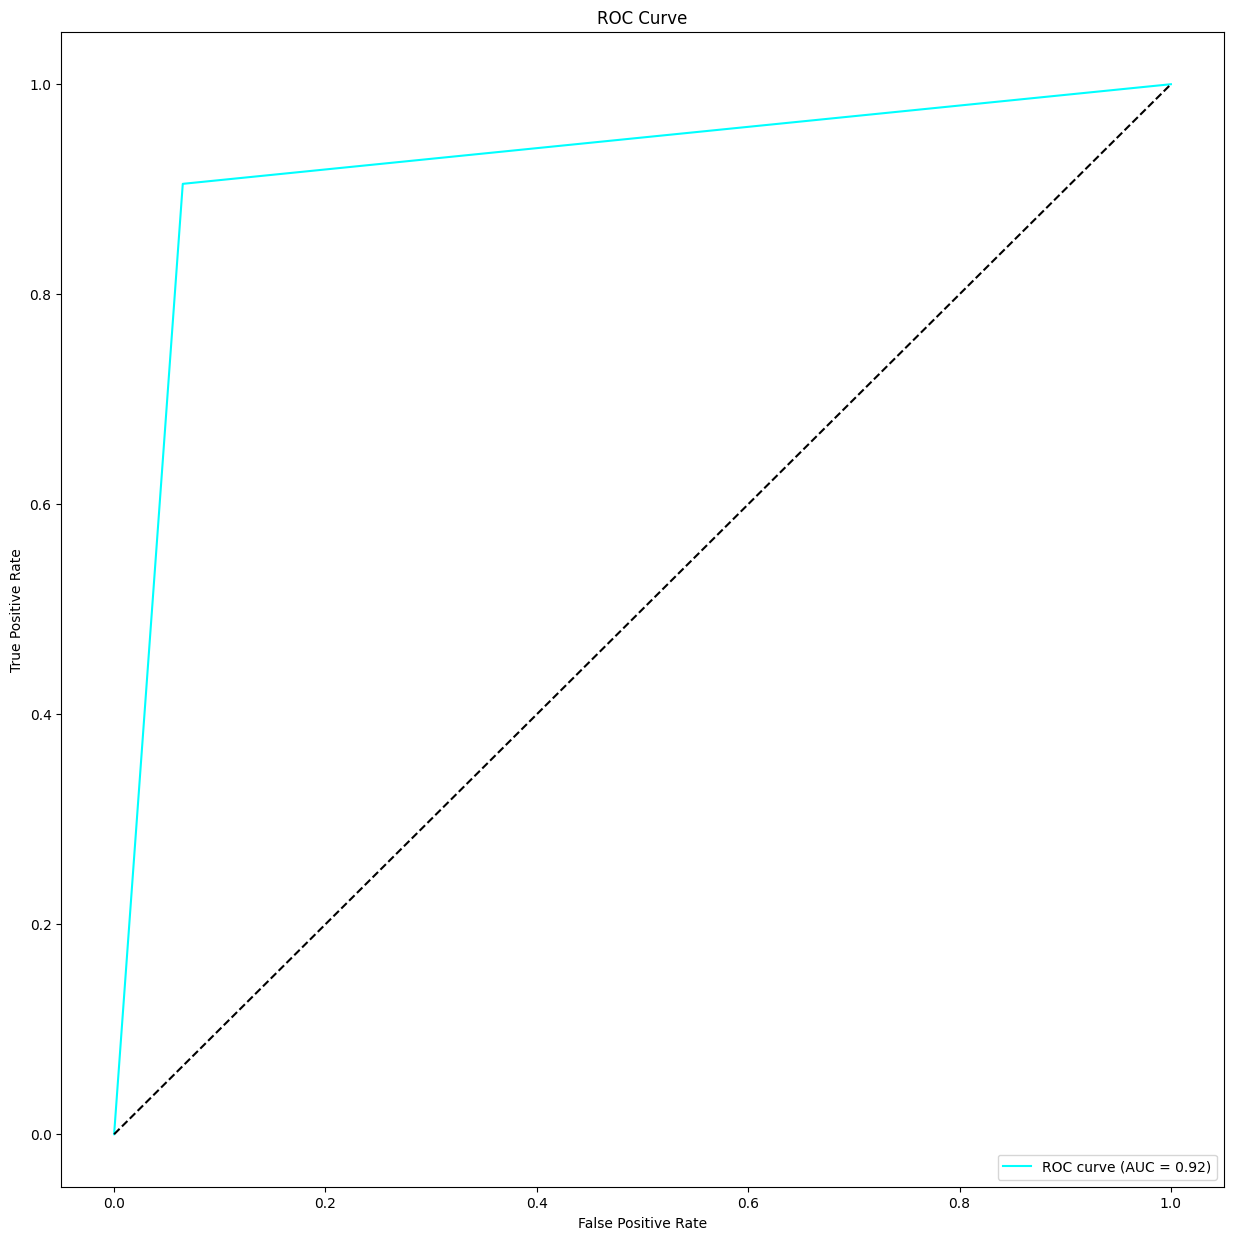

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3571
         1.0       0.90      0.91      0.90      2340

    accuracy                           0.92      5911
   macro avg       0.92      0.92      0.92      5911
weighted avg       0.92      0.92      0.92      5911



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True, p=0.2)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66049


STAGE:2024-02-10 17:16:38 61610:61610 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.9158, macro-f1: 0.9116
Epoch 1/15 - Training Time: 7.09 seconds | Inference Time: 1.05 seconds
Epoch 2/15 - Test Accuracy: 0.9239, macro-f1: 0.9206
Epoch 2/15 - Training Time: 7.01 seconds | Inference Time: 1.05 seconds
Epoch 3/15 - Test Accuracy: 0.9252, macro-f1: 0.9216
Epoch 3/15 - Training Time: 6.91 seconds | Inference Time: 1.03 seconds
Epoch 4/15 - Test Accuracy: 0.9234, macro-f1: 0.9200
Epoch 4/15 - Training Time: 6.94 seconds | Inference Time: 1.04 seconds
Epoch 5/15 - Test Accuracy: 0.9232, macro-f1: 0.9193
Epoch 5/15 - Training Time: 7.06 seconds | Inference Time: 1.07 seconds
Epoch 6/15 - Test Accuracy: 0.9217, macro-f1: 0.9179
Epoch 6/15 - Training Time: 7.24 seconds | Inference Time: 1.03 seconds
Epoch 7/15 - Test Accuracy: 0.9200, macro-f1: 0.9164
Epoch 7/15 - Training Time: 7.18 seconds | Inference Time: 1.05 seconds
Epoch 8/15 - Test Accuracy: 0.9225, macro-f1: 0.9190
Epoch 8/15 - Training Time: 7.19 seconds | Inference Time: 1.05 seconds


STAGE:2024-02-10 17:18:51 61610:61610 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 17:18:52 61610:61610 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.04%        8.244s        74.71%       68.104s       4.671ms      -3.56 Gb      -3.63 Gb         14580  
                              Optimizer.step#AdamW.step         7.42%        6.769s        38.33%       34.939s       2.650ms     516.05 Kb      -6.34 Gb         13185  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        24.76%       22.573s        25.23%       22.998s       1.574ms       3.55 Gb       3.55

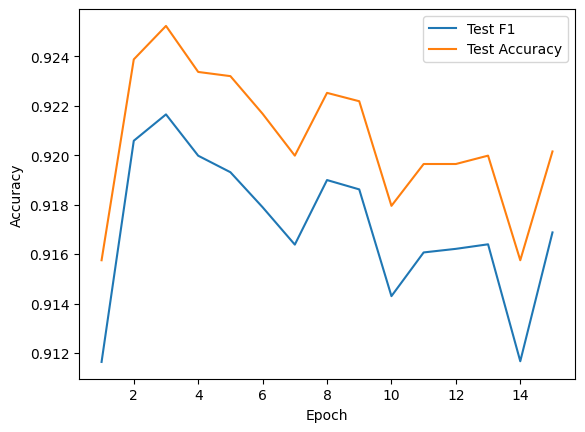

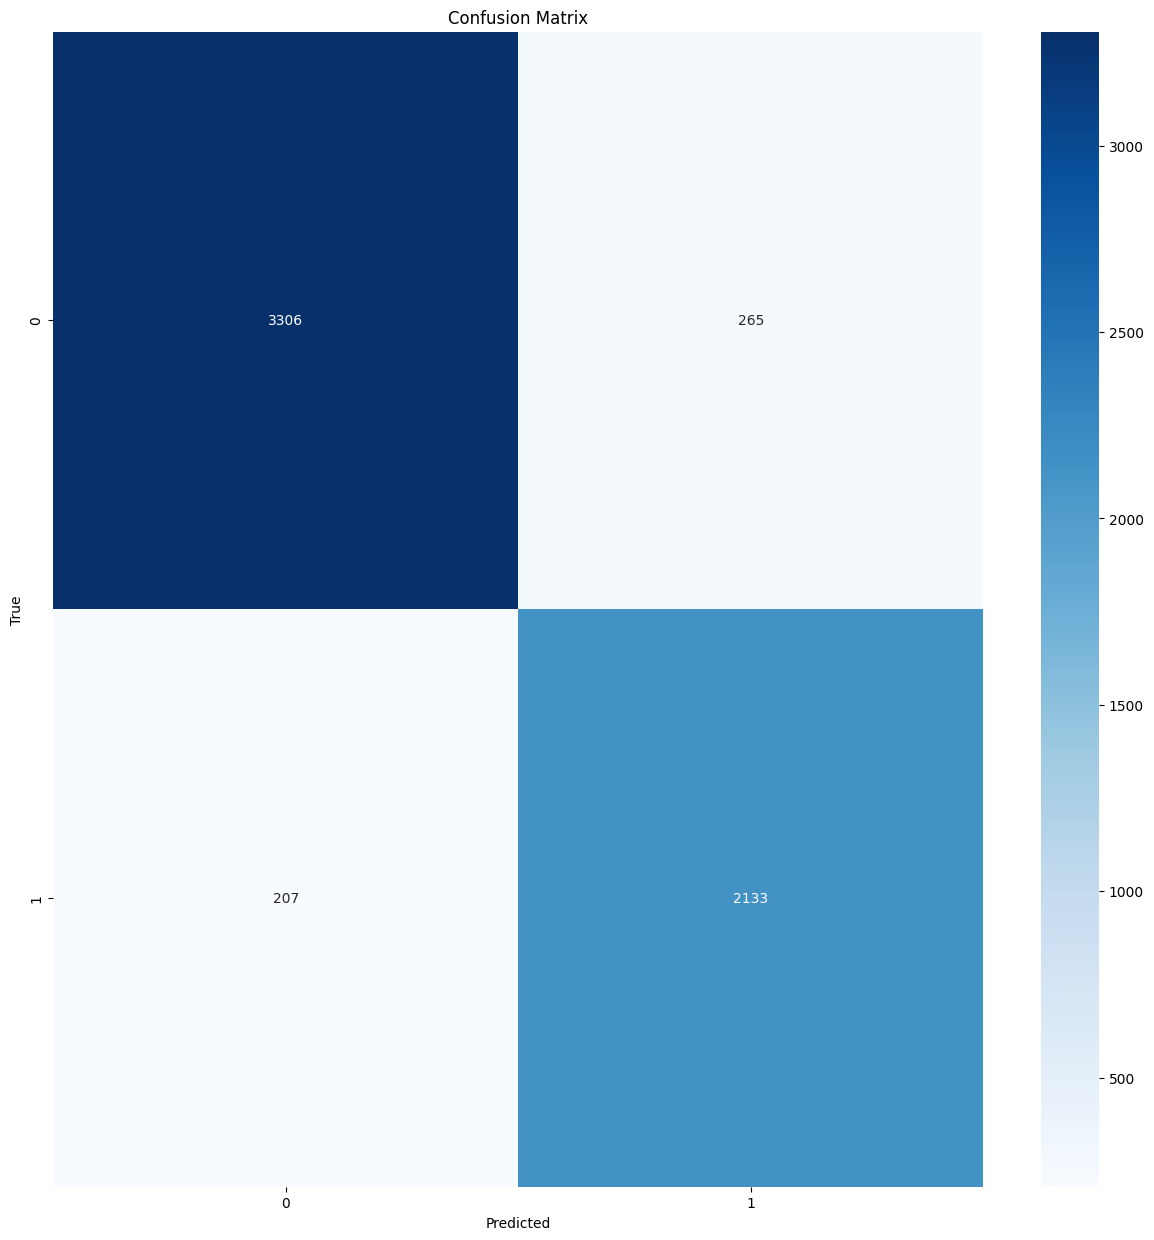

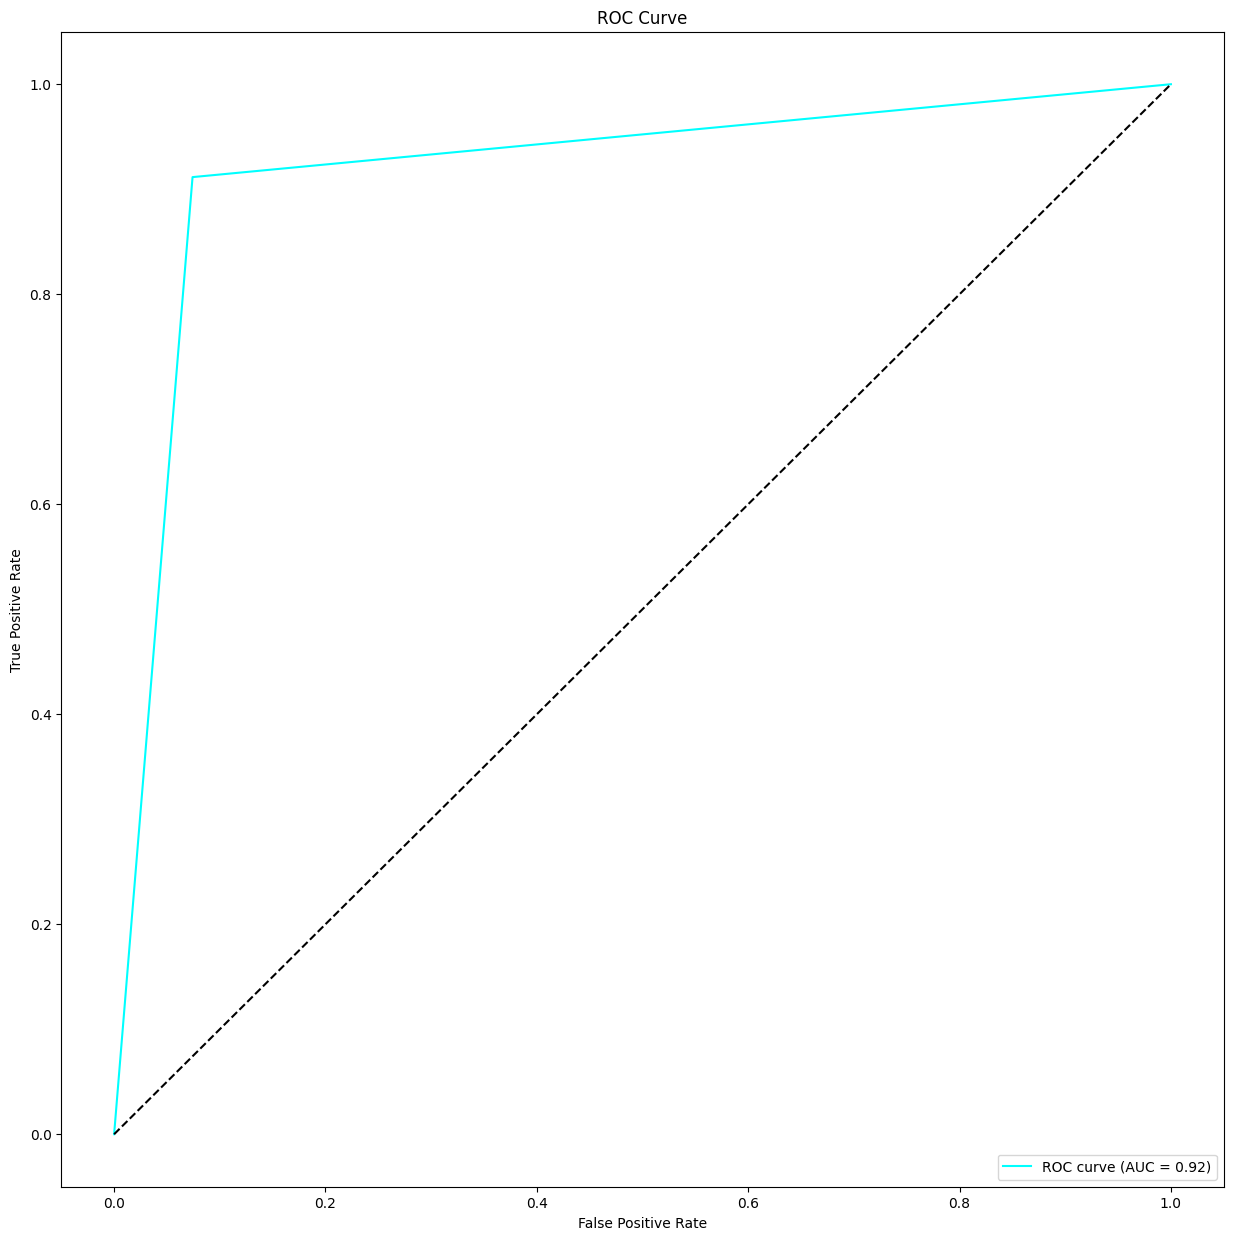

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      3571
         1.0       0.89      0.91      0.90      2340

    accuracy                           0.92      5911
   macro avg       0.92      0.92      0.92      5911
weighted avg       0.92      0.92      0.92      5911



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True, p=0.2)